In [1]:
import numpy as np
import ngmix
import matplotlib.pyplot as plt

import piff
import galsim

import seaborn as sns

import piff

%matplotlib notebook

%load_ext autoreload
%autoreload 2

In [35]:
from matts_misc.piff_wl_sims.des_piff import DES_Piff

In [82]:
%%time

psf_model = DES_Piff(
    file_name="/Users/Matt/DESDATA/y3_piff/y3a1-v29/242414/D00242414_r_c16_r2362p01_piff.fits")

CPU times: user 74.7 ms, sys: 7.63 ms, total: 82.4 ms
Wall time: 77.8 ms


In [85]:
x = 1
y = 2048
psf_obj = psf_model.getPSF(galsim.PositionD(x, y), None)
interp_psf_obj = psf_model._draw(galsim.PositionD(x, y))

psfm = psf_obj.drawImage(nx=19, ny=19, scale=0.25)
psfi = interp_psf_obj.drawImage(nx=19, ny=19, scale=0.25)

nse = np.std(psfi.array[:, 0])

galsim.Shear(g1=-0.02055979802355965,g2=-0.00929951181327551)
galsim.Shear(g1=-0.020174385143956513,g2=-0.008609104283229115)


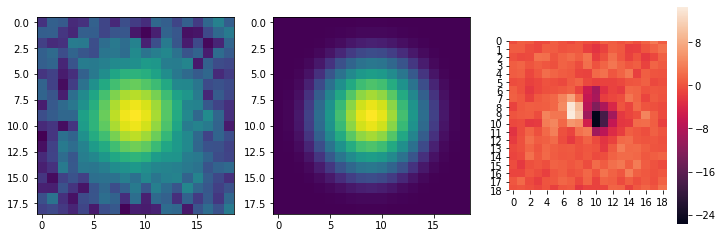

In [86]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
axs[0].imshow(np.arcsinh(psfi.array/nse))
axs[1].imshow(np.arcsinh(psfm.array/nse))
sns.heatmap((psfi.array - psfm.array)/nse, ax=axs[2], square=True)

from galsim.hsm import FindAdaptiveMom

print(FindAdaptiveMom(psfm).observed_shape)
print(FindAdaptiveMom(psfi).observed_shape)

Linf: 0.0


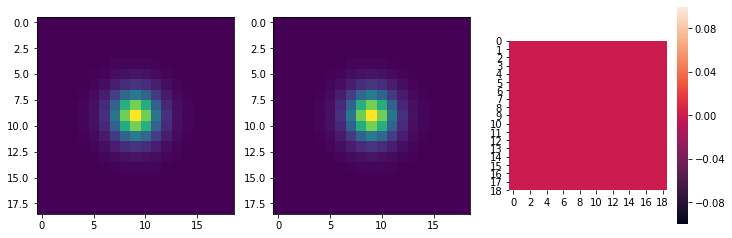

In [98]:
psf_model1 = DES_Piff(
    file_name="/Users/Matt/DESDATA/y3_piff/y3a1-v29/242414/D00242414_r_c16_r2362p01_piff.fits")

psf_model2 = DES_Piff(
    file_name="/Users/Matt/DESDATA/y3_piff/y3a1-v29/242414/D00242414_r_c16_r2362p01_piff.fits")

x = 10.5
y = 200.6
psf_obj1 = psf_model1.getPSF(galsim.PositionD(x, y), None)
psf_obj2 = psf_model2.getPSF(galsim.PositionD(x, y), None)

psfm1 = psf_obj1.drawImage(nx=19, ny=19, scale=0.25)
psfm2 = psf_obj2.drawImage(nx=19, ny=19, scale=0.25)


fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
axs[0].imshow(psfm1.array)
axs[1].imshow(psfm2.array)
sns.heatmap((psfm2.array - psfm1.array), ax=axs[2], square=True)

print('Linf:', np.max(np.abs(psfm1.array - psfm2.array)))

In [ ]:
psf_model = piff.read("/Users/Matt/DESDATA/y3_piff/y3a1-v29/242414/D00242414_r_c16_r2362p01_piff.fits")

In [ ]:
img = galsim.Image(17, 17, scale=0.25)
image_pos = galsim.PositionD(x=10, y=11)
dx = image_pos.x - int(image_pos.x + 0.5)
dy = image_pos.y - int(image_pos.y + 0.5)
img = psf_model.draw(
    image_pos.x,
    image_pos.y,
    image=img,
    offset=(-dx, -dy))

In [ ]:
nse = np.std(np.concatenate([img.array[0, :], img.array[-1, :]]))

In [ ]:
wgt = np.ones_like(img.array) / nse**2

In [ ]:
jac = ngmix.DiagonalJacobian(x=8, y=8, scale=0.25)

In [ ]:
obs = ngmix.Observation(image=img.array, weight=wgt, jacobian=jac)

In [ ]:
from ngmix.fitting import LMSimple, FitterBase

In [ ]:
lm = LMSimple(obs, 'turb')

In [ ]:
lm.go(am.get_result()['pars'])

In [ ]:
model = lm.get_gmix().make_image?

In [ ]:
model = lm.get_gmix().make_image

In [ ]:
model = lm.get_gmix().make_image

In [ ]:
gm = lm.get_gmix()

In [ ]:
model_img = gm.make_image((17, 17), jacobian=obs.jacobian)

In [ ]:

sns.heatmap((model_img - obs.image) * np.sqrt(obs.weight))

In [ ]:
loc = 5

plt.figure()
plt.plot(obs.image[loc, :], label='data', color='b')
plt.plot(obs.image[loc, :] + nse, 'b:', label='data')
plt.plot(obs.image[loc, :] - nse, 'b:', label='data')
plt.plot(model_img[loc, :], label='model', color='r')
plt.legend()

In [ ]:
loc = 5

plt.figure()
plt.plot(obs.image[:, loc], label='data', color='b')
plt.plot(obs.image[:, loc] + nse, 'b:', label='data')
plt.plot(obs.image[:, loc] - nse, 'b:', label='data')
plt.plot(model_img[:, loc], label='model', color='r')
plt.legend()

In [ ]:
pm = psf_model.wcs[0]